In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df1 = pd.read_csv('HCPReHoPower2011.csv')
df2 = pd.read_csv('unrestricted.csv',sep=';')


/var/folders/sm/hmm_qwmj0rjfxblg2m_hsl6h0000gn/T/ipykernel_40973/2589332612.py:2: DtypeWarning: Columns (181,190,396,397,400,401,403,406,408) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('unrestricted.csv',sep=';')


In [102]:
# Calculate average across REST1/LR, REST1/RL, REST2/LR, REST2/RL 
grouped = df1.groupby('subject', as_index=False)
averaged_df1 = grouped.mean()

# Merge them together 
merged_df = pd.merge(averaged_df1, df2, left_on='subject', right_on='Subject')

# Ouput the merged dataframe
merged_df.to_csv('merged_data.csv', index=False)


/var/folders/sm/hmm_qwmj0rjfxblg2m_hsl6h0000gn/T/ipykernel_40973/1828973240.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  averaged_df1 = grouped.mean()


In [108]:
# Step 1: train/test split
X = merged_df.iloc[:,1:264]
y = merged_df['FS_BrainSeg_Vol_No_Vent']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3 , random_state=100, shuffle=True)

# Step 2: Standardize features (important for regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Train a Linear Regression Model on Data
model = LinearRegression()
model.fit(X_train, y_train)

#Step 4: Prediction
y_pred = model.predict(X_test)

#Step 5: Scoring
r_squared = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r_squared:.2f}")
n = len(y)
p = X.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n-1) / (n - p - 1)
print(f"Adjusted R-squared:{adjusted_r_squared:.4f}")

R-squared (R2) Score: 0.59
Adjusted R-squared:0.4606


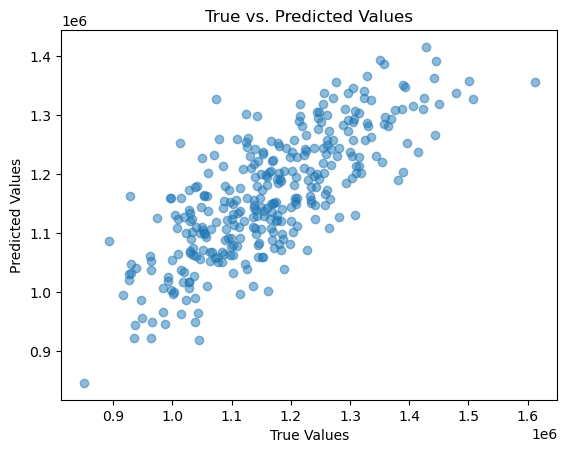

In [109]:
# visualization
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values")
plt.show()